In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'
from matplotlib.markers import MarkerStyle

In [15]:
sdp_train = [1.7369, 0.2515, 0.1125, 0.3733, 0.4884, 0.6032]
all_dp= [1.0000, 0.3219, 0.6666, 0.9799, 0.9572, 1.0139]
no_dp = [2.3219, 5.6439, 5.5735, 6.7799, 7.6938, 6.5438]
sdp_decode = [2.5650, 0.6215, 0.2688, 1.8751, 3.1183, 2.8920]

sdp_train_ppl = 1.6095
all_dp_ppl = 1.7175
no_dp_ppl = 1.47628
sdp_decode_ppl = 2.5650

In [28]:
df = pd.DataFrame({'预测的数字位数': [i + 1 for i in range(6)], 'sdp_train': sdp_train, 'all_dp': all_dp, 'no_dp': no_dp, 'sdp_decode': sdp_decode})
df

,预测的数字位数,sdp_train,all_dp,no_dp,sdp_decode
0,1,1.7369,1.0000,2.3219,2.5650
1,2,0.2515,0.3219,5.6439,0.6215
2,3,0.1125,0.6666,5.5735,0.2688
3,4,0.3733,0.9799,6.7799,1.8751
4,5,0.4884,0.9572,7.6938,3.1183
5,6,0.6032,1.0139,6.5438,2.8920


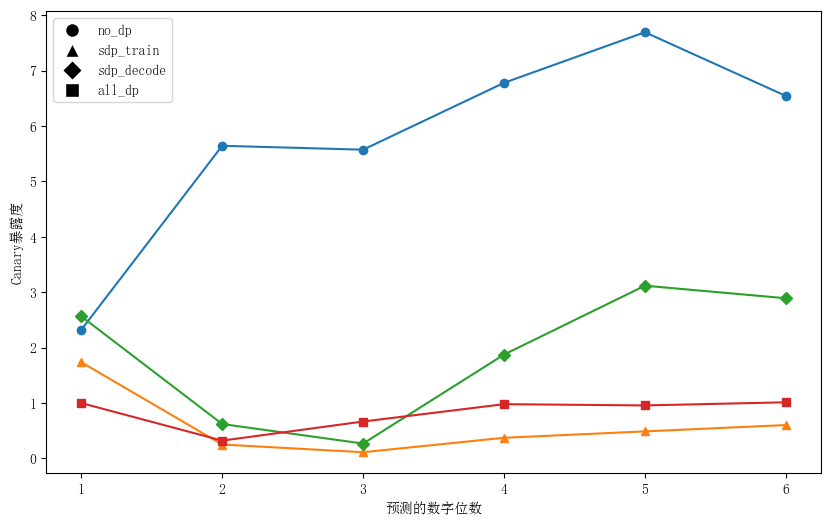

In [46]:
markers = ['o', '^', 'D', 's'] # 分别代表圆形，三角形，菱形和正方形

from matplotlib.lines import Line2D

ax = df.set_index('预测的数字位数')[['no_dp', 'sdp_train', 'sdp_decode', 'all_dp']].plot(figsize=(10,6))
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i]) # 为每个数据系列设置标记形状
ax.set_ylabel('Canary暴露度')
ax.set_xlabel('预测的数字位数')
ax.set_xticks([i + 1 for i in range(6)])

# # 添加注记
# for column in df.columns[1:]:
#     for i, value in enumerate(df[column]):
#         ax.annotate(f"{value:.2f}", xy=(i+1, value), xytext=(i+1-0.2, value+0.2), fontsize=10)

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i]) # 为每个数据系列设置标记形状

# 添加注记
legend_elements = [Line2D([0], [0], marker='o', color='w', label='no_dp', markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='sdp_train', markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='D', color='w', label='sdp_decode', markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='all_dp', markerfacecolor='black', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left')

In [21]:
df = pd.DataFrame({'预测的数字位数': [i + 1 for i in range(6)], 
                   'sdp_train': sdp_train, 
                   'all_dp': all_dp, 
                   'no_dp': no_dp, 
                   'sdp_decode': sdp_decode, 
                   'marker': ['s', 'o', '^', 'p', 'd', '*']})
df

,预测的数字位数,sdp_train,all_dp,no_dp,sdp_decode,marker
0,1,1.7369,1.0000,2.3219,2.5650,s
1,2,0.2515,0.3219,5.6439,0.6215,o
2,3,0.1125,0.6666,5.5735,0.2688,^
3,4,0.3733,0.9799,6.7799,1.8751,p
4,5,0.4884,0.9572,7.6938,3.1183,d
5,6,0.6032,1.0139,6.5438,2.8920,*


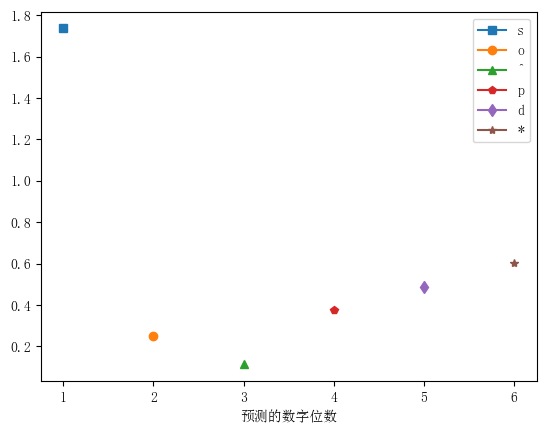

In [23]:

# 绘图
fig, ax = plt.subplots()
for marker in df['marker'].unique():
    df[df['marker'] == marker].plot(x='预测的数字位数', y='sdp_train', ax=ax, marker=marker, label=marker)

plt.legend()
plt.show()